In [1]:
# coding: utf-8
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
func_f = lambda x: (x ** 2 * np.array([1, 100])).sum()
func_g = lambda x: x * np.array([2, 200])

In [3]:
xx1 = np.linspace(-100, 100, 500)
xx2 = np.linspace(-50, 50, 500)
X1, X2 = np.meshgrid(xx1, xx2)
Y = np.apply_along_axis(func_f, 0, np.stack([X1, X2], axis=0))

In [4]:
def plot_contour(X1, X2, Y, steps=[]):
    plt.contour(X1, X2, Y)
    for i in range(1, len(steps)):
        a, b = steps[i]
        a_pre, b_pre = steps[i-1]
        plt.plot(np.array([a, a_pre]), np.array([b, b_pre]), 'o-')
    plt.show()

In [5]:
init_x = np.array([90.0, 50.0])

SGD一直在垂直方向微小震荡，收敛很慢

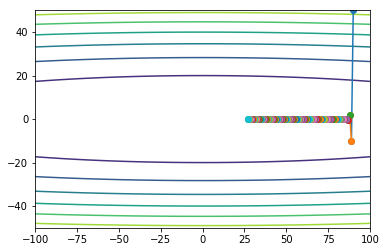

In [6]:
def SGD(init_x, epochs=100, lr=0.006):
    x = init_x.copy()
    steps = [x.copy()]
    for i in range(epochs):
        g = func_g(x)
        x -= lr * g
        steps.append(x.copy())
    return steps
plot_contour(X1, X2, Y, SGD(init_x))

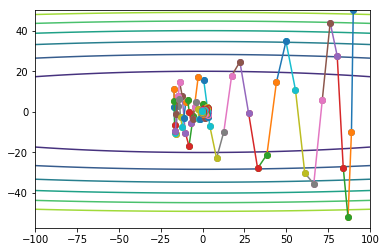

In [7]:
def momentum(init_x, epochs=100, lr=0.006, alpha=0.9):
    x = init_x.copy()
    steps = [x.copy()]
    v = np.zeros(x.shape)
    for i in range(epochs):
        g = func_g(x)
        v = alpha * v + lr * g
        x -= v
        steps.append(x.copy())
    return steps
plot_contour(X1, X2, Y, momentum(init_x))

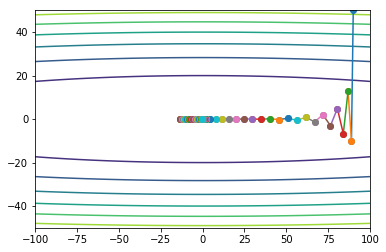

In [8]:
def NAG(init_x, epochs=100, lr=0.006, alpha=0.9):
    x = init_x.copy()
    steps = [x.copy()]
    v = np.zeros(x.shape)
    for i in range(epochs):
        v = alpha * v + lr * func_g(x - alpha * v)
        x -= v
        steps.append(x.copy())
    return steps
plot_contour(X1, X2, Y, NAG(init_x))